In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
# Analyzing the Dataset Statistics

print("Total number of passengers of both training and test set:", train_data.PassengerId.count() + test_data.PassengerId.count())
print("Survivor Stats of training set:")
train_data.Survived.value_counts()

Total number of passengers of both training and test set: 1309
Survivor Stats of training set:


0    549
1    342
Name: Survived, dtype: int64

In [4]:
# Check for any other unusable (NaN) values

print(pd.isnull(train_data).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


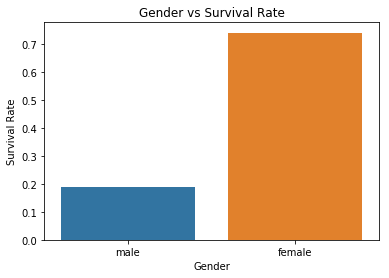

In [7]:
# Plotting a bargraph for survival rate by gender

plt.title('Gender vs Survival Rate')
sns.barplot(x = "Sex", y = "Survived", data = train_data, ci = None)
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

# Finding percentages of men and women who survived

print("Percentage of females who survived:", train_data["Survived"][train_data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train_data["Survived"][train_data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


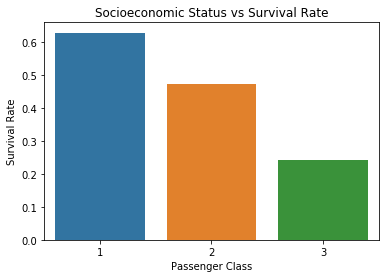

In [8]:
# Plotting a bargraph for survival rate by socioeconomic class

plt.title('Socioeconomic Status vs Survival Rate')
sns.barplot(x = "Pclass", y = "Survived", data = train_data, ci = None)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Finding percentages of survival rate by Pclass

print("Percentage of Pclass = 1 who survived:", train_data["Survived"][train_data["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", train_data["Survived"][train_data["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", train_data["Survived"][train_data["Pclass"] == 3].value_counts(normalize = True)[1]*100)

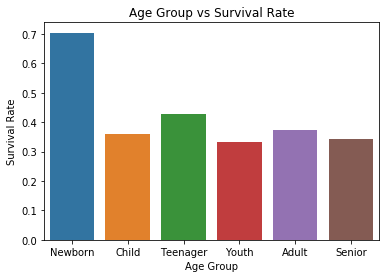

In [9]:
# Taking Care of Missing Ages in the ages column

mean_value = train_data["Age"].mean()
train_data["Age"] = train_data["Age"].fillna(mean_value)
test_data["Age"] = test_data["Age"].fillna(mean_value)
bins = [0, 5, 12, 18, 25, 50, 80]
labels = ["Newborn", "Child", "Teenager", "Youth", "Adult", "Senior"]
train_data["AgeGroup"] = pd.cut(train_data["Age"], bins, labels = labels)
test_data["AgeGroup"] = pd.cut(test_data["Age"], bins, labels = labels)
plt.title('Age Group vs Survival Rate')
sns.barplot(x = "AgeGroup", y = "Survived", data = train_data, ci = None)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSP = 1 who survived: 53.588516746411486
Percentage of SibSP = 2 who survived: 46.42857142857143
Percentage of SibSP = 3 who survived: 25.0
Percentage of SibSP = 4 who survived: 16.666666666666664


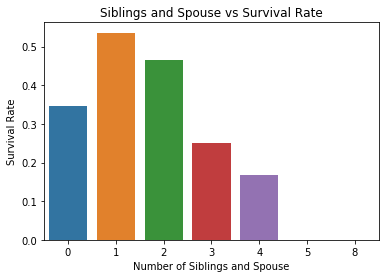

In [10]:
# Plotting a bargraph for survival rate by number of siblings/spouses

plt.title('Siblings and Spouse vs Survival Rate')
sns.barplot(x = "SibSp", y = "Survived", data = train_data, ci = None)
plt.xlabel('Number of Siblings and Spouse')
plt.ylabel('Survival Rate')

# Finding percentages of survival rate by number of siblings/spouses

print("Percentage of SibSp = 0 who survived:", train_data["Survived"][train_data["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSP = 1 who survived:", train_data["Survived"][train_data["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSP = 2 who survived:", train_data["Survived"][train_data["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of SibSP = 3 who survived:", train_data["Survived"][train_data["SibSp"] == 3].value_counts(normalize = True)[1]*100)
print("Percentage of SibSP = 4 who survived:", train_data["Survived"][train_data["SibSp"] == 4].value_counts(normalize = True)[1]*100)

Percentage of Parch = 0 who survived: 34.365781710914455
Percentage of Parch = 1 who survived: 55.08474576271186
Percentage of Parch = 2 who survived: 50.0
Percentage of Parch = 3 who survived: 60.0
Percentage of Parch = 5 who survived: 20.0


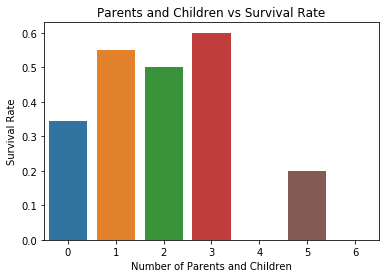

In [11]:
# Plotting a bargraph for survival rate by number of parents/children

plt.title('Parents and Children vs Survival Rate')
sns.barplot(x = "Parch", y = "Survived", data = train_data, ci = None)
plt.xlabel('Number of Parents and Children')
plt.ylabel('Survival Rate')

# Finding percentages of survival rate by number of parents and children

print("Percentage of Parch = 0 who survived:", train_data["Survived"][train_data["Parch"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of Parch = 1 who survived:", train_data["Survived"][train_data["Parch"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Parch = 2 who survived:", train_data["Survived"][train_data["Parch"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Parch = 3 who survived:", train_data["Survived"][train_data["Parch"] == 3].value_counts(normalize = True)[1]*100)
# print("Percentage of Parch = 4 who survived:", train_data["Survived"][train_data["Parch"] == 4].value_counts(normalize = True)[1]*100)
print("Percentage of Parch = 5 who survived:", train_data["Survived"][train_data["Parch"] == 5].value_counts(normalize = True)[1]*100)

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


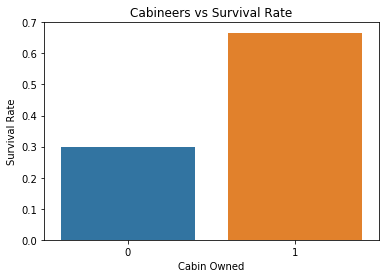

In [12]:
# Plotting a bargraph for relation between people who had their cabin

train_data["CabinBool"] = (train_data["Cabin"].notnull().astype(int))
test_data["CabinBool"] = (test_data["Cabin"].notnull().astype(int))

plt.title('Cabineers vs Survival Rate')
sns.barplot(x = "CabinBool", y = "Survived", data = train_data, ci = None)
plt.xlabel('Cabin Owned')
plt.ylabel('Survival Rate')

# Calculate percentages of Cabin who survived
print("Percentage of CabinBool = 1 who survived:", train_data["Survived"][train_data["CabinBool"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of CabinBool = 0 who survived:", train_data["Survived"][train_data["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

In [13]:
# Dropping columns which have no useful data

train_data = train_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Cabin'], axis = 1)

train_data = train_data.drop(['Ticket'], axis = 1)
test_data = test_data.drop(['Ticket'], axis = 1)

In [14]:
# Taking Care of Missing values in the Embarkments column

print("Number of people embarking in Southampton (S):", end=' ')
southampton = train_data[train_data["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):", end=' ')
cherbourg = train_data[train_data["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):", end=' ')
queenstown = train_data[train_data["Embarked"] == "Q"].shape[0]
print(queenstown)

train_data = train_data.fillna({"Embarked": "S"})

Number of people embarking in Southampton (S): 644
Number of people embarking in Cherbourg (C): 168
Number of people embarking in Queenstown (Q): 77


In [15]:
# Combining training and test dataset for filling missing age values

combined=[train_data, test_data]

In [16]:
# Extracting the titles from the names column

for dataset in combined:
    dataset["Title"]=dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_data["Title"],train_data["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Adult,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Adult,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Senior,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Adult,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Youth,0,Mrs


In [18]:
# Replacing various titles with more common names

for dataset in combined:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_data[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [19]:
# Mapping genders to a numerical value to prepare our model

sex_mapping = {"male": 0, "female": 1}
train_data["Sex"] = train_data["Sex"].map(sex_mapping)
test_data["Sex"] = test_data["Sex"].map(sex_mapping)

In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,Youth,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,Adult,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,Adult,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,Adult,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,Adult,0,Mr


In [21]:
# Mapping embarked values to a numerical value to prepare our model

embark_mapping = {"S": 0, "C": 1, "Q": 3}
train_data["Embarked"] = train_data["Embarked"].map(embark_mapping)
test_data["Embarked"] = test_data["Embarked"].map(embark_mapping)

In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,Youth,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,Adult,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,Adult,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,Adult,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,Adult,0,Mr


In [23]:
# Mapping title to numerical values to prepare out model

title_mapping = {"Mr":5, "Mrs":4, "Master":3, "Miss":2,"Rare":1, "Royal":0}
train_data["Title"] = train_data["Title"].map(title_mapping)
test_data["Title"] = test_data["Title"].map(title_mapping)

In [24]:
# Dropping columns which have no useful data

train_data = train_data.drop(['AgeGroup'], axis = 1)
test_data = test_data.drop(['AgeGroup'], axis = 1)

train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

In [25]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0,5
1,2,1,1,1,38.0,1,0,71.2833,1,1,4
2,3,1,3,1,26.0,0,0,7.9250,0,0,2
3,4,1,1,1,35.0,1,0,53.1000,0,1,4
4,5,0,3,0,35.0,0,0,8.0500,0,0,5


In [26]:
# Plotting a heatmap to find the correlation of the features

corr = train_data.corr()
corr.shape

(11, 11)

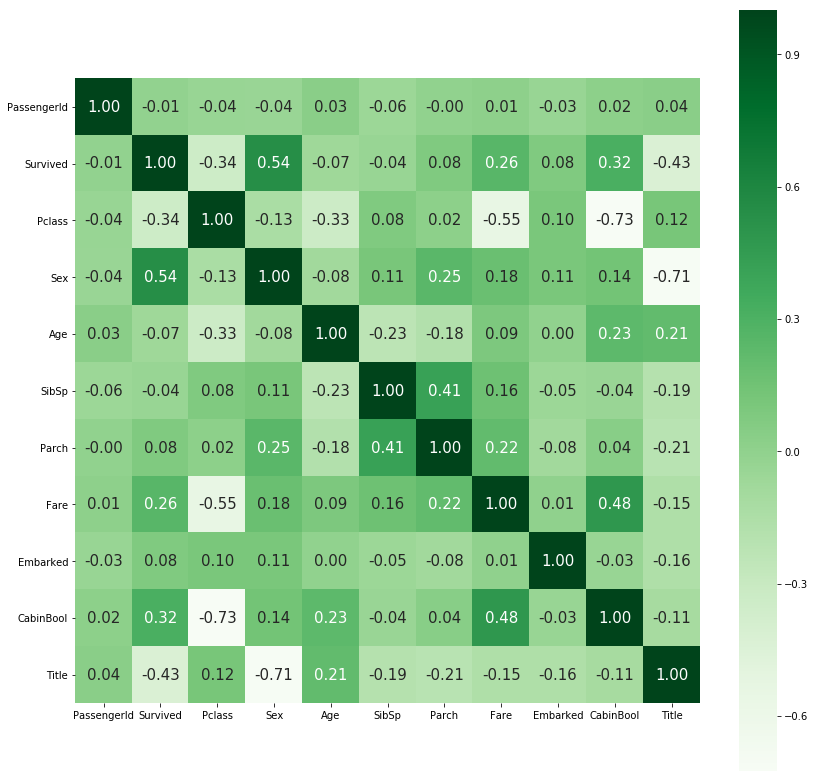

In [27]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=True, square= True, fmt='.2f',annot=True,annot_kws={'size':15}, cmap='Greens')

In [28]:
# Preparing and comparing different models for the above data

X_pred = train_data.drop(["Survived", "PassengerId"], axis = 1)
y_pred = train_data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_pred, y_pred, test_size = 0.1981, random_state = 0)

In [29]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression()
log_regressor.fit(X_train, y_train)
y_pred = log_regressor.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The accuracy of the Logistic Regression model is: ', acc_logreg, 'percent')

The accuracy of the Logistic Regression model is:  80.79 percent


In [30]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The accuracy of the Gaussian Naive Bayes model is: ', acc_gaussian, 'percent')

The accuracy of the Gaussian Naive Bayes model is:  77.97 percent


In [31]:
# Support Vector Machines

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The accuracy of the Support Vector Machine model is: ', acc_svc, 'percent')

The accuracy of the Support Vector Machine model is:  71.75 percent


In [32]:
# Linear SVC

from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The accuracy of the Linear Support Vector Machine model is: ', acc_linear_svc, 'percent')

The accuracy of the Linear Support Vector Machine model is:  70.62 percent


In [33]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The accuracy of the Decision Tree model is: ', acc_decisiontree, 'percent')

The accuracy of the Decision Tree model is:  78.53 percent


In [34]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The accuracy of the Decision Tree model is: ', acc_randomforest, 'percent')

The accuracy of the Decision Tree model is:  84.75 percent


In [35]:
# KNN or k-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print('The accuracy of the Decision Tree model is: ', acc_knn, 'percent')

The accuracy of the Decision Tree model is:  74.58 percent


In [36]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg, acc_randomforest, acc_gaussian, acc_linear_svc, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.75
2,Logistic Regression,80.79
6,Decision Tree,78.53
4,Naive Bayes,77.97
1,KNN,74.58
0,Support Vector Machines,71.75
5,Linear SVC,70.62
